In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier


In [2]:
#Import vaers data
data = pd.read_csv(r"C:\Users\vicki\Desktop\FinalProject\finalprojectsite\vaers.csv")
print(data.columns)
data

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'SEX', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'ONSETDAYS', 'SymptomQty', 'CovidVaccine', 'agegrp'],
      dtype='object')


,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,RECOVD,VAX_DATE,ONSET_DATE,ONSETDAYS,SymptomQty,CovidVaccine,agegrp
0,902792,12/16/2020,CA,31.0,F,Y,12/16/2020,12/16/2020,0.0,3,Y,30-39
1,902794,12/16/2020,TX,35.0,M,Y,12/15/2020,12/15/2020,0.0,3,Y,30-39
2,903165,12/17/2020,TX,35.0,F,Y,12/15/2020,12/15/2020,0.0,3,Y,30-39
3,904152,12/19/2020,CA,68.0,M,Y,12/19/2020,12/19/2020,0.0,6,Y,60-69
4,904450,12/20/2020,TX,44.0,M,N,12/15/2020,12/16/2020,1.0,3,Y,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...
84990,1514787,7/30/2021,CA,72.0,F,Y,2/1/2021,2/1/2021,0.0,10,Y,70+
84991,1514803,7/30/2021,FL,80.0,F,N,3/18/2021,3/19/2021,1.0,14,Y,70+
84992,1514811,7/30/2021,FL,56.0,M,N,5/21/2021,6/2/2021,12.0,4,Y,50-59
84993,1514817,7/30/2021,FL,72.0,M,N,2/11/2021,4/1/2021,49.0,8,Y,70+


In [3]:
#Total rows and columns
print(data.shape)

(84995, 12)


In [4]:
#Vaers Data Stats
print(data.describe())

           VAERS_ID       AGE_YRS     ONSETDAYS    SymptomQty
count  8.499500e+04  84995.000000  84070.000000  84995.000000
mean   1.177463e+06     48.712881      4.582086      4.459909
std    1.650100e+05     18.169647     14.170117      3.735439
min    9.025140e+05      0.080000      0.000000      1.000000
25%    1.037823e+06     35.000000      0.000000      2.000000
50%    1.169752e+06     49.000000      1.000000      4.000000
75%    1.304664e+06     63.000000      3.000000      6.000000
max    1.514855e+06    105.000000    406.000000     96.000000


In [5]:
#Total VAERS submissions for Covid vaccine side effects
df1 = data.groupby('agegrp').agg({'CovidVaccine':['count']}).reset_index()
df1

,agegrp,CovidVaccine
,,count
0,0-12,381
1,13-19,4473
2,20-29,9138
3,30-39,14862
4,40-49,15048
5,50-59,14848
6,60-69,14108
7,70+,12137


In [6]:
#VAERS submissions dataset by Actual Age
df2 = data.groupby('AGE_YRS').agg({'CovidVaccine':['count']}).reset_index()

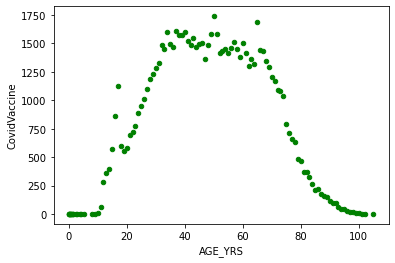

In [14]:
#Vaers submissions by actual age chart
df2.plot(kind='scatter',x='AGE_YRS',y='CovidVaccine',color='green')
plt.show()

In [8]:
#Vaers grouped by age range data
df3 = data.groupby('agegrp').agg({'CovidVaccine':['count']}).reset_index()

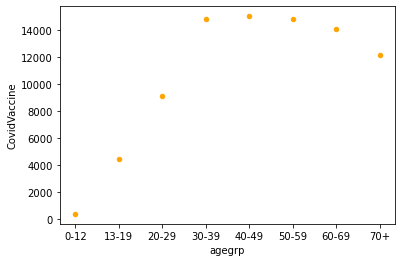

In [15]:
#Vaers grouped by age range chart
df3.plot(kind='scatter',x='agegrp',y='CovidVaccine',color='orange')
plt.show()

In [10]:
#Average Onset Days Data  by age grouping
df4 = data.groupby('agegrp').agg({'ONSETDAYS':['mean']}).reset_index()

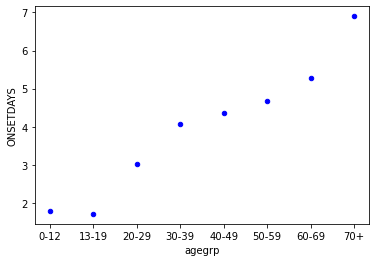

In [11]:
#Average Onset Days Plot by age grouping
df4.plot(kind='scatter',x='agegrp',y='ONSETDAYS',color='blue')
plt.show()

In [12]:
df5 = data.groupby(['agegrp', 'SEX']).agegrp.count().unstack()
df5

SEX,F,M,U
agegrp,,,
0-12,182,188,11
13-19,2435,1979,59
20-29,6250,2841,47
30-39,11010,3794,58
40-49,11489,3507,52
50-59,11020,3784,44
60-69,10120,3935,53
70+,8291,3807,39


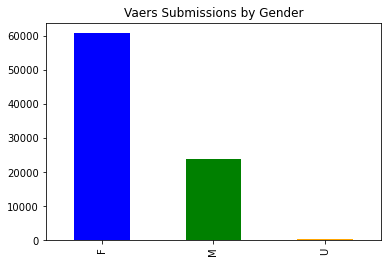

In [13]:
data["SEX"].value_counts().plot.bar(color=['blue', 'green', 'orange'], title='Vaers Submissions by Gender',);